In [257]:
# The dataset can be seen from here: https://www.kaggle.com/danielgrijalvas/movies

# First let's import the packages we will use in this project
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# Now we need to read in the data
df = pd.read_csv(r'C:\Users\arsalper\Desktop\python\movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [258]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()
CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]
CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 
CompanyGrossSumSorted

company
Warner Bros.                 56491421806
Universal Pictures           52514188890
Columbia Pictures            43008941346
Paramount Pictures           40493607415
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9230230105
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

In [259]:
#Let's groupby company and year based on gross sum
#You can remove the head() and see all
df.groupby(['company', 'year'])[["gross"]].sum().head()

,,gross
company,year,
"""DIA"" Productions GmbH & Co. KG",2003,44350926.0
"""Weathering With You"" Film Partners",2019,193457467.0
.406 Production,1996,10580.0
1+2 Seisaku Iinkai,2000,1196218.0
10 West Studios,2010,814906.0


In [260]:
#Let's see the top 15 companies that has the highest gross sum
CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()
CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','year'], ascending = False)[:15]
CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 
CompanyGrossSumSorted

company                year
Walt Disney Pictures   2019    5773131804
Marvel Studios         2018    4018631866
Universal Pictures     2015    3834354888
Twentieth Century Fox  2009    3793491246
Walt Disney Pictures   2017    3789382071
Paramount Pictures     2011    3565705182
Warner Bros.           2010    3300479986
                       2011    3223799224
Walt Disney Pictures   2010    3104474158
Paramount Pictures     2014    3071298586
Columbia Pictures      2006    2934631933
                       2019    2932757449
Marvel Studios         2019    2797501328
Warner Bros.           2018    2774168962
Columbia Pictures      2011    2738363306
Name: gross, dtype: int64

In [261]:
#Let's see the top 15 companies that has the highest gross sum without their years, overall
CompanyGrossSum = df.groupby(['company'])[["gross"]].sum()
CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company'], ascending = False)[:15]
CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 
CompanyGrossSumSorted

company
Warner Bros.                 56491421806
Universal Pictures           52514188890
Columbia Pictures            43008941346
Paramount Pictures           40493607415
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9230230105
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

In [262]:
#lets check the columns
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [263]:
#for columns
df.columns.isnull()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [264]:
#lets check if we have any nulls in the data
df[df.columns].isnull().tail()
#it looks like we do have some nulls

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7663,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False
7664,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False
7665,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True
7666,False,True,False,False,False,True,True,False,False,False,False,False,True,True,False
7667,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False


In [265]:
# We need to see alternatively if we have any missing data
# Let's loop through the data and see if there is anything missing for col in df.columns:

for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(percent_missing*100)))

name - 0.0%
rating - 1.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 28.0%
gross - 2.0%
company - 0.0%
runtime - 0.0%


In [266]:
# Data Types for our columns

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [267]:
#Since, budget has 28.0% of NaN values, let us convert NaN values to zero in budget to make further calculation in it
df['budget'] = df['budget'].replace(np.nan, '0', regex=True)
#Alternatively: df['budget'].replace(pd.np.NaN,'0',inplace=True)
df['budget'].tail()

7663     7000
7664        0
7665    58750
7666    15000
7667        0
Name: budget, dtype: object

In [268]:
#Since, budget has 2.0% of NaN values, let us convert NaN values to zero in gross to make further calculation in it
df['gross'] = df['gross'].replace(np.nan, '0', regex=True)
#Alternatively: df['gross'].replace(pd.np.NaN,'0',inplace=True)
df['gross'].tail()

7663    0
7664    0
7665    0
7666    0
7667    0
Name: gross, dtype: object

In [269]:
#let's convert the type of gross and budget to integer
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
print(df.dtypes)

#ValueError: Cannot convert non-finite values (NA or inf) to integer
#we could not do it due to NA values in column
#as proved above budget has %20 of missing data as gross has %2
#will come back to that in following

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object


In [270]:
#looks like we have this amount of NaN in our data, we corrected most important ones, so lets proceed
df.isna().sum()

name         0
rating      77
genre        0
year         0
released     2
score        3
votes        3
director     0
writer       3
star         1
country      3
budget       0
gross        0
company     17
runtime      4
dtype: int64

In [271]:
#looks like these are all the rows that has a NaN, -- to reduce the file size i added the head() func remove it to see all
df[df.isna().any(axis=1)].head()

#We could drop all the Nan values via df.dropna(axis=0, how='all', inplace=True ) 
#but we dont want to lose our data, so lets convert them into 0 instead in some columns that we want to change the type into integer

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
78,Babylon,NaN,Drama,1980,November 1980 (United Kingdom),7.4,1300.0,Franco Rosso,Franco Rosso,David N. Haynes,United Kingdom,0,109749,Diversity Music,95.0
91,Mantis Fist Fighter,NaN,Action,1980,"July 9, 1982 (United States)",6.7,230.0,Wing-Cho Yip,Hsin-Yi Chang,Ka-Yan Leung,Hong Kong,0,0,East Asia Film Company,89.0
102,Das Boot,NaN,Adventure,1981,"February 10, 1982 (United States)",8.3,237000.0,Wolfgang Petersen,Wolfgang Petersen,Jürgen Prochnow,West Germany,0,11487676,Bavaria Film,149.0
298,The State of Things,NaN,Drama,1982,"February 18, 1983 (United States)",7.0,3000.0,Wim Wenders,Robert Kramer,Allen Garfield,West Germany,0,3700,Gray City,121.0
408,A Night in Heaven,R,Drama,1983,"November 18, 1983 (United States)",4.3,1200.0,John G. Avildsen,Joan Tewkesbury,Christopher Atkins,United States,0,5563663,NaN,83.0


In [272]:
#lets advance sort the values
#Instead of simple one: df.sort_values('budget').head()
df.sort_values(by=['budget'], inplace=False, ascending=False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
7075,Star Wars: Episode VIII - The Last Jedi,PG-13,Action,2017,"December 15, 2017 (United States)",7.0,581000.0,Rian Johnson,Rian Johnson,Daisy Ridley,United States,317000000,1332698830,Walt Disney Pictures,152.0
5060,Pirates of the Caribbean: at World's End,PG-13,Action,2007,"May 25, 2007 (United States)",7.1,608000.0,Gore Verbinski,Ted Elliott,Johnny Depp,United States,300000000,960996492,Walt Disney Pictures,169.0
7066,Justice League,PG-13,Action,2017,"November 17, 2017 (United States)",6.1,418000.0,Zack Snyder,Jerry Siegel,Ben Affleck,United States,300000000,657926987,Warner Bros.,120.0


In [273]:
#In order to see all the tabs, lets add this, so that we can see all of the data
#Yet, i will not use it to make the size of the file to much for github --it is a small note for the reader
pd.set_option('display.max_rows', None)

In [274]:
#Lets advance sort again to see all
df.sort_values(by=['budget'], inplace=False, ascending=False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
7075,Star Wars: Episode VIII - The Last Jedi,PG-13,Action,2017,"December 15, 2017 (United States)",7.0,581000.0,Rian Johnson,Rian Johnson,Daisy Ridley,United States,317000000,1332698830,Walt Disney Pictures,152.0
5060,Pirates of the Caribbean: at World's End,PG-13,Action,2007,"May 25, 2007 (United States)",7.1,608000.0,Gore Verbinski,Ted Elliott,Johnny Depp,United States,300000000,960996492,Walt Disney Pictures,169.0
7066,Justice League,PG-13,Action,2017,"November 17, 2017 (United States)",6.1,418000.0,Zack Snyder,Jerry Siegel,Ben Affleck,United States,300000000,657926987,Warner Bros.,120.0


In [275]:
#Lets drop duplicates for the company to see all the unique companies
df['company'].drop_duplicates().sort_values(ascending= False ).head()

7129                     thefyzz
5664                 micro_scope
6412    iDeal Partners Film Fund
4007                    i5 Films
6793                  i am OTHER
Name: company, dtype: object

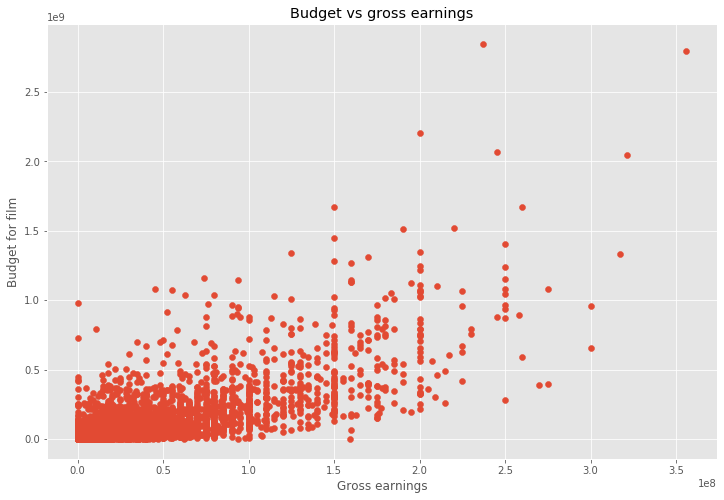

In [276]:
#Let us create a scatterplot to see the correlation among the variables

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs gross earnings')
plt.xlabel('Gross earnings')
plt.ylabel('Budget for film')
plt.show()

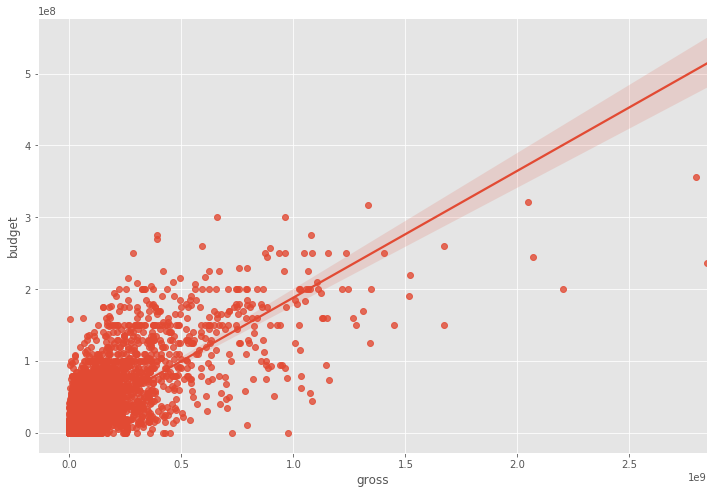

In [277]:
#Lets use regression plot to see the relationship b/w gross and budget

sns.regplot(x="gross", y="budget", data=df)
#it looks like budget and gross positive correlated, lets dive deep more 

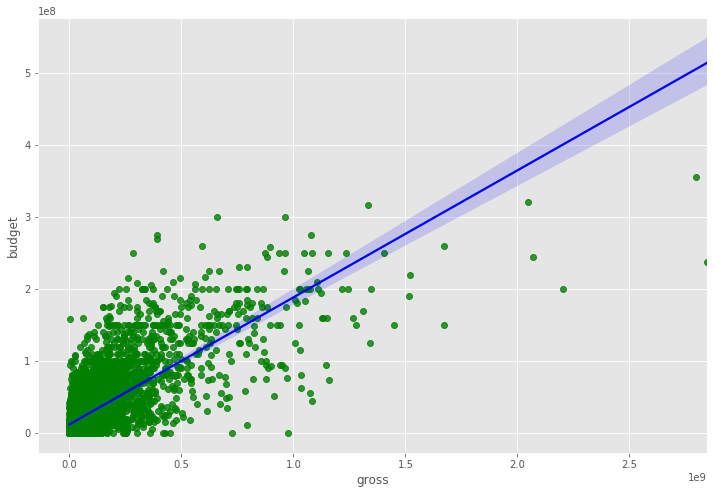

In [278]:
#lets visualize the regression to see better
sns.regplot(x="gross", y="budget", data=df, scatter_kws={"color":"green"}, line_kws={"color":"blue"})

In [279]:
#lets see the correlation
#noting that this works only numerical data, not string or etc.
#by default we have here is pearson method
df.corr()
#it looks like there is a +0.750157 correlation b/w gross and budget

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510
gross,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000


In [280]:
#lets check kendall method
df.corr("kendall")
#it looks like there is a +0.541956 correlation b/w gross and budget 

,year,score,votes,budget,gross,runtime
year,1.000000,0.067652,0.331465,0.209304,0.216595,0.097184
score,0.067652,1.000000,0.300115,-0.005194,0.090626,0.283611
votes,0.331465,0.300115,1.000000,0.439902,0.560118,0.198240
budget,0.209304,-0.005194,0.439902,1.000000,0.541956,0.176016
gross,0.216595,0.090626,0.560118,0.541956,1.000000,0.176912
runtime,0.097184,0.283611,0.198240,0.176016,0.176912,1.000000


In [281]:
#lets check kendall method
df.corr("spearman")
#it looks like there is a +0.716816 correlation b/w gross and budget

,year,score,votes,budget,gross,runtime
year,1.000000,0.099045,0.469829,0.291152,0.314681,0.142977
score,0.099045,1.000000,0.428138,-0.007500,0.132569,0.399857
votes,0.469829,0.428138,1.000000,0.604627,0.752265,0.290159
budget,0.291152,-0.007500,0.604627,1.000000,0.716816,0.246748
gross,0.314681,0.132569,0.752265,0.716816,1.000000,0.256783
runtime,0.142977,0.399857,0.290159,0.246748,0.256783,1.000000


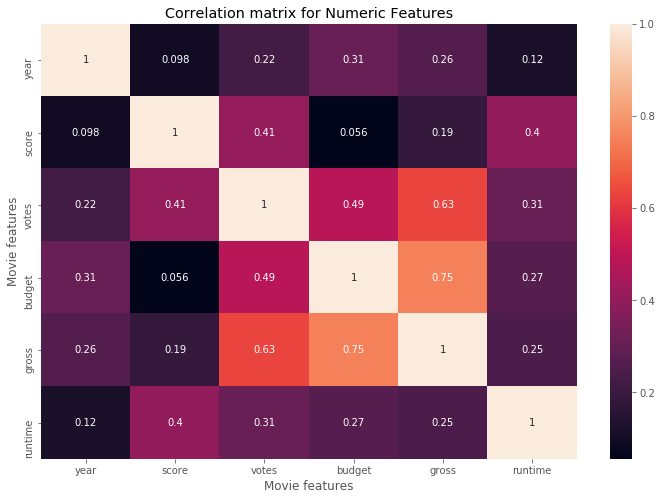

In [282]:
#Overall we have high correlation based on spearman method 
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot= True)
plt.title("Correlation matrix for Numeric Features")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()
#that approves our approach, which meant
# H0: There is no relationship b/w gross and budget independent variables
# H1: There is a relationship b/w gross and budget independent variables
# H0 will fail, and we would interpret as there is a correlation and it is 0.750157.

In [283]:
#Let us use categorical data type to see further to see any correlation with them
#To do that, let us assign numeric type to them to work on further
df_numerized = df
for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0


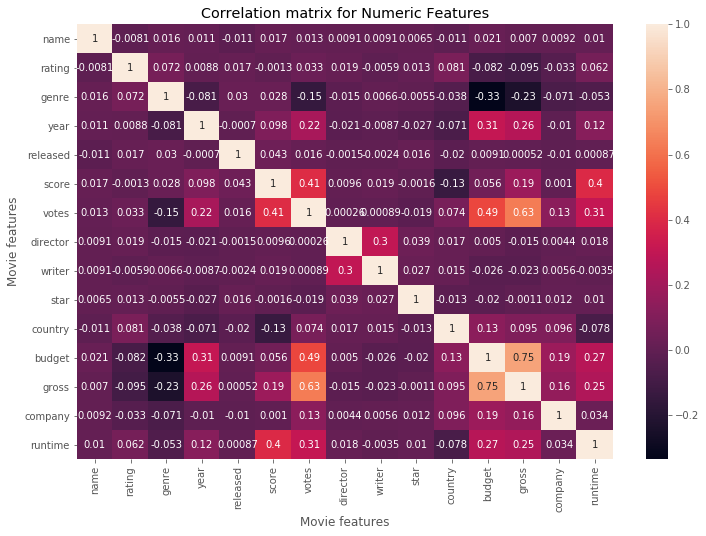

In [244]:
#We know that there may be dummy variables, in the data; yet lets see the correlation among the categorical data
correlation_matrix = df_numerized.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for all Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

#There is a 0.63 correlation b/w revanue and votes (high correlation we can call)
#There is a 0.49 correlation b/w revanue and votes (good correlation we can call)
#The rest does not look promising to say if there is a correlation based on the data

In [284]:
#Let us try to see correlation among variables from another way
correlation_matrix = df_numerized.corr()
correlation_pairs = correlation_matrix.unstack()
correlation_pairs.head()

name  name        1.000000
      rating     -0.008069
      genre       0.016355
      year        0.011453
      released   -0.011311
dtype: float64

In [285]:
#Lets see it by sorting it and pairing
sorted_pairs = correlation_pairs.sort_values()
sorted_pairs.head()

genre   budget   -0.334021
budget  genre    -0.334021
gross   genre    -0.234297
genre   gross    -0.234297
        votes    -0.145307
dtype: float64

In [286]:
#Looks confusing, lets see the ones that are bigger than 0.5
high_correlation = sorted_pairs[(sorted_pairs)>0.5]
high_correlation
#As it seen there is a high correlation b/w
#    0.632834 b/w gross and votes
#    0.750157 b/w gross and budget      

gross     votes       0.632834
votes     gross       0.632834
budget    gross       0.750157
gross     budget      0.750157
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

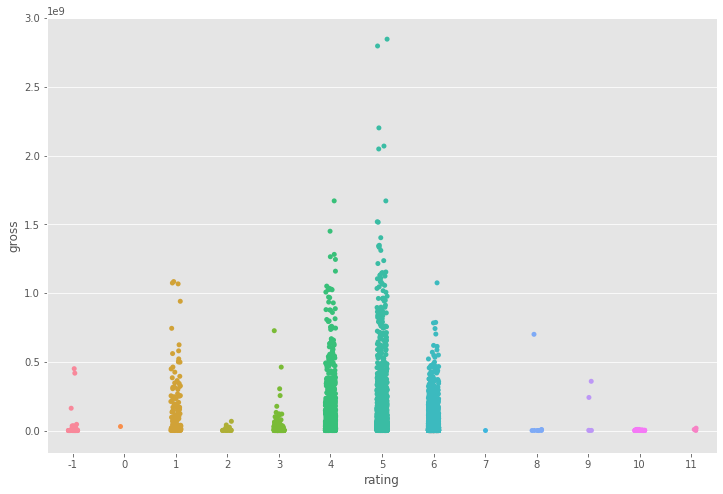

In [288]:
#Let's see the stripplot to see the relationship b/w gross and rating
#Note: we could also use swarmplot as sns.swarmplot(x="rating", y="gross", data=df)
sns.stripplot(x="rating", y="gross", data=df)
#We can see a normal distrubition here, which means the highest gross earning movies does not mean they have the highest rating

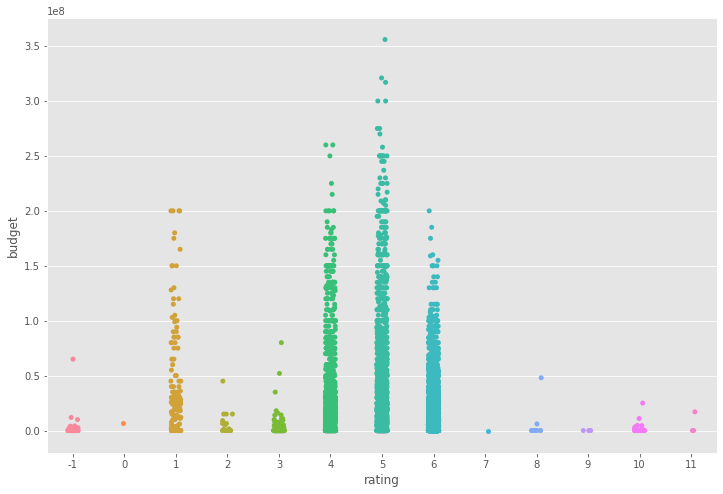

In [290]:
#Let's see the stripplot to see the relationship b/w budget and rating
sns.stripplot(x="rating", y="budget", data=df)
#Again a normal distrubution, it means the highest budget does not mean they have the highest rating for that movie.